<h1>Resolución automática de un Sudoku</h1>
En este último cuaderno vamos a implementar la solución automática del Sudoku usando como base el algoritmo anterior y mostraremos un log de resultados con los cambios realizados a nivel de Celda y de Tablero.

<h2>Código base para empezar a trabajar</h2>
A continuación vamos a escribir el código Python que venimos usando para nuestro proyecto de Sudoku.

In [1]:
# Importaciones necesarias
import matplotlib.pyplot as plt
import numpy as np
import ast

In [2]:
# Clase Celda
class Celda:
    def __init__(self, numero=0):
        self.numero = numero
        self.listado_de_anotaciones = set()

    def establecer_numero(self, numero):
        self.numero = numero
        self.listado_de_anotaciones.clear()

    def agregar_anotacion(self, anotacion):
        self.listado_de_anotaciones.add(anotacion)

    def eliminar_anotacion(self, anotacion):
        self.listado_de_anotaciones.discard(anotacion)

    def limpiar_anotaciones(self):
        self.listado_de_anotaciones.clear()

    def __repr__(self):
        return f"Celda(numero={self.numero}, listado_de_anotaciones={sorted(self.listado_de_anotaciones)})"

In [3]:
# Clase Tablero
class Tablero:
    def __init__(self):
        self.matriz = [[Celda() for _ in range(3)] for _ in range(3)]
        # Crear el conjunto válido con los números del 1 al 9
        self.conjunto_valido = set(range(1, 10))

    def obtener_conjunto_numeros(self):
        conjunto_numeros = set()
        for fila in self.matriz:
            for celda in fila:
                if celda.numero != 0:
                    conjunto_numeros.add(celda.numero)
        return conjunto_numeros

    def esta_resuelto_tablero(self):
        conjunto_tablero = self.obtener_conjunto_numeros()
        return conjunto_tablero == self.conjunto_valido
    
    def __repr__(self):
        return '\n'.join([' '.join([str(celda.numero) for celda in fila]) for fila in self.matriz])

In [4]:
# Clase Sudoku
class Sudoku:
    def __init__(self):
        self.matriz = [[Celda() for _ in range(9)] for _ in range(9)]

    def obtener_conjunto_columna(self, n):
        return {self.matriz[i][n].numero for i in range(9) if self.matriz[i][n].numero != 0}

    def obtener_conjunto_fila(self, n):
        return {self.matriz[n][i].numero for i in range(9) if self.matriz[n][i].numero != 0}

    def obtener_conjunto_tablero(self, n):
        fila_inicio = (n // 3) * 3
        col_inicio = (n % 3) * 3
        return {self.matriz[fila_inicio + i][col_inicio + j].numero 
                for i in range(3) for j in range(3) if self.matriz[fila_inicio + i][col_inicio + j].numero != 0}

    def es_fila_resuelta(self, n):
        return self.obtener_conjunto_fila(n) == set(range(1, 10))

    def es_columna_resuelta(self, n):
        return self.obtener_conjunto_columna(n) == set(range(1, 10))

    def es_tablero_resuelto(self, n):
        return self.obtener_conjunto_tablero(n) == set(range(1, 10))

    def es_sudoku_resuelto(self):
        # Verifica que todas las filas, columnas y subtableros estén completos
        for i in range(9):
            if not self.es_fila_resuelta(i) or not self.es_columna_resuelta(i) or not self.es_tablero_resuelto(i):
                return False

        # Verifica que no haya celdas con anotaciones
        for fila in self.matriz:
            for celda in fila:
                if celda.numero == 0 or bool(celda.listado_de_anotaciones):
                    return False

        return True

    def reiniciar_sudoku(self):
        for i in range(9):
            for j in range(9):
                self.matriz[i][j].establecer_numero(0)
                self.matriz[i][j].limpiar_anotaciones()

    def dibujar_sudoku(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        for i in range(10):
            if i == 0 or i == 9:
                linewidth = 5  # Líneas exteriores más gruesas
            elif i % 3 == 0:
                linewidth = 2  # Líneas interiores que separan subtableros 3x3
            else:
                linewidth = 1  # Otras líneas
            ax.plot([i, i], [0, 9], color='black', linewidth=linewidth)
            ax.plot([0, 9], [i, i], color='black', linewidth=linewidth)

        for i in range(9):
            for j in range(9):
                celda = self.matriz[i][j]
                if celda.numero != 0:
                    ax.text(j + 0.5, 8.5 - i, str(celda.numero), fontsize=20, ha='center', va='center')
                else:
                    anotaciones = sorted(celda.listado_de_anotaciones)
                    for k, anotacion in enumerate(anotaciones):
                        ax.text(j + (k % 3) * 0.3 + 0.2, 8.8 - i - (k // 3) * 0.3, str(anotacion), fontsize=8, ha='center', va='center', color='darkblue')

        ax.set_xlim(0, 9)
        ax.set_ylim(0, 9)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()

    def __repr__(self):
        return '\n'.join([' '.join([str(celda.numero) if celda.numero != 0 else '.' for celda in fila]) for fila in self.matriz])

In [5]:
class PintarSudoku:
    def __init__(self, sudoku):
        self.sudoku = sudoku

    def dibujar_sudoku(self, color_celda='white', fila=-1, columna=-1, tablero=-1, pos=None, color_fila='lightgrey', color_columna='lightgrey', color_tablero='lightgrey', color_pos='darkgrey'):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(0, 9)
        ax.set_ylim(0, 9)
        ax.set_xticks([])
        ax.set_yticks([])

        # Pintar todas las celdas
        for i in range(9):
            for j in range(9):
                ax.add_patch(plt.Rectangle((j, 8 - i), 1, 1, color=color_celda, zorder=0))

        # Pintar la fila
        if fila >= 0:
            ax.add_patch(plt.Rectangle((0, fila), 9, 1, color=color_fila, zorder=0))

        # Pintar la columna
        if columna >= 0:
            ax.add_patch(plt.Rectangle((columna, 0), 1, 9, color=color_columna, zorder=0))

        # Pintar el tablero 3x3
        if tablero >= 0:
            fila_inicio = (tablero // 3) * 3
            col_inicio = (tablero % 3) * 3
            ax.add_patch(plt.Rectangle((col_inicio, 8 - fila_inicio - 2), 3, 3, color=color_tablero, zorder=0))

        # Pintar la posición específica
        if pos is not None:
            i, j = pos
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color_pos, zorder=2))

        # Dibujar la cuadrícula
        for i in range(10):
            linewidth = 5 if i == 0 or i == 9 else 2 if i % 3 == 0 else 1
            ax.plot([i, i], [0, 9], color='black', linewidth=linewidth, zorder=1)
            ax.plot([0, 9], [i, i], color='black', linewidth=linewidth, zorder=1)

       # Dibujar los números y anotaciones
        for i in range(9):
            for j in range(9):
                celda = self.sudoku.matriz[i][j]
                if celda.numero != 0:
                    ax.text(j + 0.5, 8.5 - i, str(celda.numero), fontsize=20, ha='center', va='center', zorder=4)
                else:
                    anotaciones = sorted(celda.listado_de_anotaciones)
                    for k, anotacion in enumerate(anotaciones):
                        x = j + (k % 3) * 0.3 + 0.2
                        y = 8.8 - i - (k // 3) * 0.3
                        ax.text(x, y, str(anotacion), fontsize=8, ha='center', va='center', color='darkblue', zorder=4)

        plt.show()

    def pintar_fila(self, fila, color='lightgrey'):
        self.dibujar_sudoku(fila=fila, color_fila=color)

    def pintar_columna(self, columna, color='lightgrey'):
        self.dibujar_sudoku(columna=columna, color_columna=color)

    def pintar_tablero(self, tablero, color='lightgrey'):
        self.dibujar_sudoku(tablero=tablero, color_tablero=color)

    def pintar_posicion(self, fila, columna, color_fila='lightgrey', color_columna='lightgrey', color_pos='darkgrey'):
        self.dibujar_sudoku(fila=fila, columna=columna, pos=(fila, columna), color_fila=color_fila, color_columna=color_columna, color_pos=color_pos)

In [6]:
# Clase CargarSudoku
class CargarSudoku:
    def __init__(self, filepath):
        self.filepath = filepath

    def cargar(self):
        with open(self.filepath, 'r') as file:
            lines = file.readlines()
        
        sudoku = Sudoku()
        for i, line in enumerate(lines):
            valores = ast.literal_eval(line.strip())  # Utilizamos ast.literal_eval para evaluar la lista
            for j, valor in enumerate(valores):
                sudoku.matriz[i][j].establecer_numero(valor)
        
        return sudoku

<h2>Cargamos un Sudoku</h2>
Vamos a cargar el mismo Sudoku del cuaderno anterior

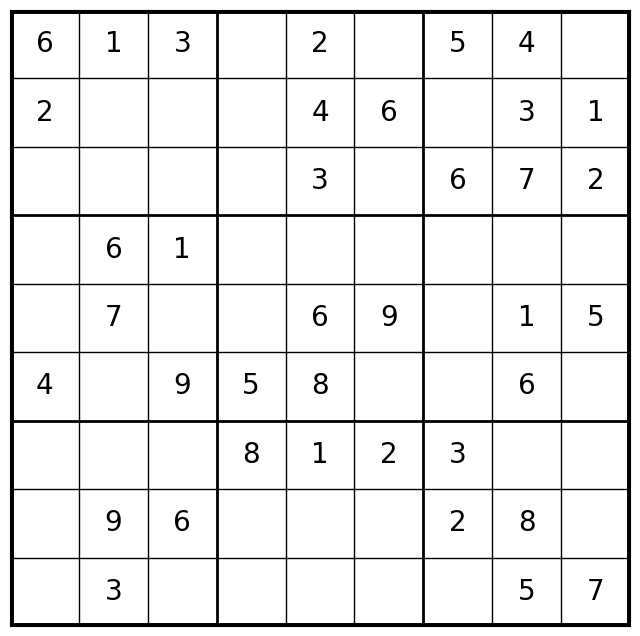

In [7]:
filepath_1 = 'sudokus/sudoku_1.suk'
cargar_sudoku_1 = CargarSudoku(filepath_1)
sudoku_1 = cargar_sudoku_1.cargar()
pintar_sudoku_1 = PintarSudoku(sudoku_1)
pintar_sudoku_1.dibujar_sudoku()

<h2>Creamos la clase ResolverSudoku</h2>
Vamos a crear la clase <b>ResolverSudoku</b> con la que iremos realizando los pasos que hicimos al resolver cada Tablero y tendremos un Log donde podremos ver los cambios realizados y los pasos que realiza nuestro algoritmo.

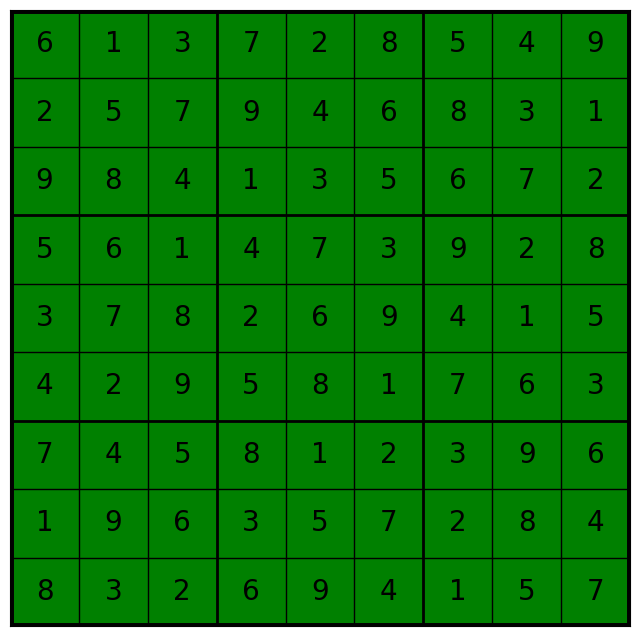

In [8]:
class ResolverSudoku:
    def __init__(self, sudoku):
        self.sudoku = sudoku
        self.log = []
        # Número de intentos para resolver el Sudoku, indicamos 50 para que no se convierta en un bucle infinito en el peor escenario
        self.num_intentos_resolver = 20
        # Contadores para saber los pasos que damos en cuanto a trabajar en el tablero o trabajar en una celda
        self.numPasosTablero = 0
        self.numPasosCelda = 0
        # Mapeamos las primeras posiciones de los 9 tableros en fila y columna (ojo tableros se numeran desde 0)
        # Ejemplo: Tablero1: pos[0,3], Tablero5: pos[3,6]   
        self.tableroPrimeraPos = [
            [0,0], [0,3], [0,6],
            [3,0], [3,3], [3,6],
            [6,0], [6,3], [6,6]
        ]

    def registrar_log(self, mensaje):
        self.log.append(mensaje)

    def mostrar_log(self):
        for entrada in self.log:
            print(entrada)

    # Mostramos la información del Sudoku a nivel de Celda
    def mostrar_info_sudoku(self, i, j, numTablero):
        print(f"Tablero{numTablero} pos[{i},{j}]={self.sudoku.matriz[i][j]}")

    # Método para resolver el Sudoku de manera automática
    def resolver_sudoku(self):
        num_intentos = 0
        # Mientras no esté resuelto el Sudoku, trata de resolver todos los tableros y 20 intentos máximo
        while not self.sudoku.es_sudoku_resuelto() and num_intentos < self.num_intentos_resolver:
            self.completar_todos_tableros()
            num_intentos += 1

    # Método que trata de completar todos los tableros
    def completar_todos_tableros(self):
        # Recorremos los 9 tableros
        for numTablero in range(9):
            self.numPasosTablero += 1
            self.completar_tablero(numTablero)
            self.registrar_log(f"Tratamos de resolver el Tablero{numTablero} NumPasosTablero({self.numPasosTablero})")
    
    # Método que trata de completar el tablero que le indicamos
    def completar_tablero(self, numTablero):
        posInicial = self.tableroPrimeraPos[numTablero]
        filaInicial = posInicial[0]
        columnaInicial = posInicial[1]
        # Recorremos las 9 posiciones del tablero y tratamos de completar las anotaciones o posiciones de cada celda
        for i in range(3):
            for j in range(3):
                self.completar_anotaciones(filaInicial+i, columnaInicial+j, numTablero)    
    
    # Método que nos ayuda a crear las anotaciones de una posición
    def completar_anotaciones(self, posFila, posColumna, numTablero):
        celda = self.sudoku.matriz[posFila][posColumna]
        # Si el número aún no está resuelto en la Celda
        if celda.numero == 0:
            conjuntoFila = self.sudoku.obtener_conjunto_fila(posFila)
            conjuntoColumna = self.sudoku.obtener_conjunto_columna(posColumna)
            conjuntoTablero = self.sudoku.obtener_conjunto_tablero(numTablero)
            posibles_numeros = set(range(1, 10)) - (conjuntoFila | conjuntoColumna | conjuntoTablero)
            self.numPasosCelda += 1
            if len(posibles_numeros) == 1:
                numero = posibles_numeros.pop()
                celda.establecer_numero(numero)
                self.registrar_log(f"Colocado {numero} en ({posFila}, {posColumna}) NumPasosCelda({self.numPasosCelda})")
            else:
                celda.listado_de_anotaciones = posibles_numeros
                self.registrar_log(f"Colocadas anotaciones {posibles_numeros} en ({posFila}, {posColumna}) NumPasosCelda({self.numPasosCelda})")

    def mostrar_log(self):
        for entrada in self.log:
            print(entrada)

resolver_sudoku_1 = ResolverSudoku(sudoku_1)
resolver_sudoku_1.resolver_sudoku()

# Si el Sudoku está resuelto lo pintamos en verde, si no está resuelto en rojo
if sudoku_1.es_sudoku_resuelto:
    pintar_sudoku_1.dibujar_sudoku(color_celda='green')
else:
    pintar_sudoku_1.dibujar_sudoku(color_celda='red')

<h2>Analizamos la complejidad de nuestro algoritmo</h2>
La complejidad ciclomática del método resolver_sudoku en términos de tiempo puede ser considerada como O(n<sup>4</sup>) debido a la estructura de los bucles anidados y la cantidad de operaciones necesarias para intentar resolver el Sudoku.

Vamos a desglosar y entender por qué se llega a esa complejidad:
<ol>
    <li><b>Bucle externo while:</b> Este bucle se ejecuta mientras el Sudoku no esté resuelto. La cantidad de iteraciones depende de cuántas veces necesitemos recorrer todos los tableros hasta que no haya más cambios. En el peor de los casos, puede ser proporcional al número de celdas, es decir, n<sup><2/sup>(para un Sudoku n×n).</li>
        <li><b>Bucle for sobre los tableros:</b> Recorremos los 9 tableros. Este bucle se ejecuta 9 veces en un Sudoku clásico 9x9</li>
        <li><b>Bucle for dentro de completar_tablero:</b> Recorre las 9 posiciones dentro de cada tablero (3 filas y 3 columnas), siendo 3x3 iteraciones</li>
        <li><b>Operaciones dentro de completar_anotaciones:</b> Verificar conjuntos de fila y columna involucra O(n) cada uno. Verificar conjuntos del tablero involucra una operación constante (9 celdas).</li>
</ol>

Vamos a ver la combinación de factores que nos lleva a esa complejidad:
<ol>
    <li>El bucle while contribuye con un factor de O(n<sup>2</sup>)</li>
    <li>Cada iteración del bucle while implica recorrer O(9) tableros, cada uno de los cuales recorre O(9) celdas, resultando en un total de O(81), que es constante para un Sudoku clásico 9x9=81</li>
    <li>Para cada celda, las operaciones dentro de completar_anotaciones son: Verificación de conjuntos de fila: O(n). Verificación de conjuntos de columna: O(n). Verificación de conjunto de tablero: O(1). Por lo tanto, la combinación de estas operaciones para cada celda es <b>O(n)+O(n)+O(1)=O(n)</b></li>
</ol>
Multiplicando todos estos factores juntos: <i><b>O(n<sup>2</sup>) x O(9) x O(9) x O(n) = O(n<sup>4</sup>)</b></i>
<br><br>
Con toda esta información podemos afirmar que la complejidad temporal en el peor de los casos es O(n<sup>4</sup>) para este método

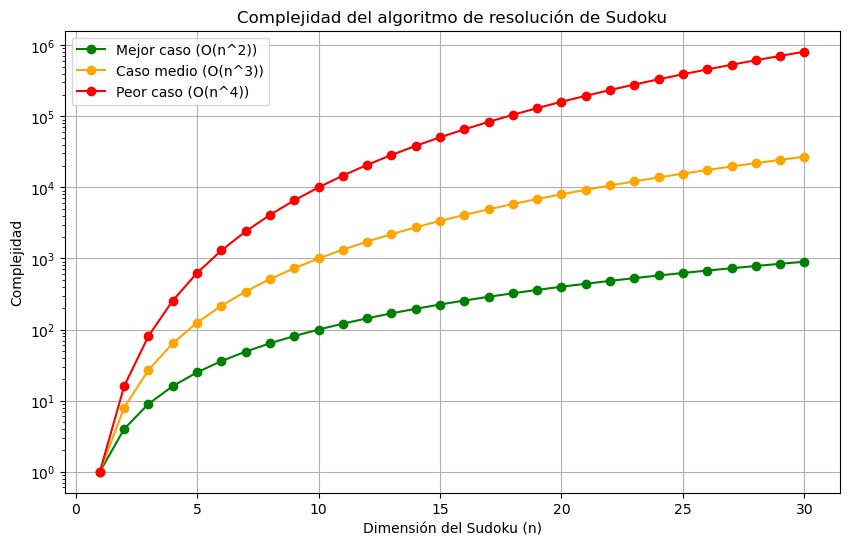

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generar un rango de valores de n (dimensión del Sudoku)
n_values = np.arange(1, 31)

# Calcular las complejidades O(n^2), O(n^3) y O(n^4)
O_n2 = n_values ** 2
O_n3 = n_values ** 3
O_n4 = n_values ** 4

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(n_values, O_n2, label='Mejor caso (O(n^2))', color='green', marker='o')
plt.plot(n_values, O_n3, label='Caso medio (O(n^3))', color='orange', marker='o')
plt.plot(n_values, O_n4, label='Peor caso (O(n^4))', color='red', marker='o')

# Agregar títulos y etiquetas
plt.title('Complejidad del algoritmo de resolución de Sudoku')
plt.xlabel('Dimensión del Sudoku (n)')
plt.ylabel('Complejidad')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Escala logarítmica para facilitar la visualización

# Mostrar la gráfica
plt.show()

El gráfico muestra la complejidad del algoritmo de resolución de Sudoku en diferentes escenarios:
<ul>
    <li><b>Mejor caso:</b> Representado por O(n<sup>2</sup>). Este es el caso donde el Sudoku se resuelve rápidamente, posiblemente debido a que muchas celdas ya están llenas y las opciones se reducen rápidamente.</li>
    <li><b>Caso medio:</b> Representado por O(n<sup>3</sup>). Este es el caso promedio, donde el algoritmo realiza un número moderado de operaciones para resolver el Sudoku.</li>
    <li><b>Peor caso:</b> Representado por O(n<sup>4</sup>). Este es el caso más desfavorable, donde el algoritmo realiza el máximo número de operaciones necesarias para resolver el Sudoku, debido a la mayor cantidad de celdas vacías y la complejidad de las posibles combinaciones.</li>
</ul>

La escala logarítmica en el eje y facilita la comparación de las tres curvas. Como puedes observar:
<ul>
    <li>En el mejor caso, la complejidad crece de manera más lenta en comparación con los otros dos casos.</li>
    <li>En el caso medio, la complejidad crece más rápido que en el mejor caso, pero más lento que en el peor caso.</li>
    <li>En el peor caso, la complejidad crece significativamente más rápido que en los otros dos casos.</li>
</ul>
Este gráfico ayuda a visualizar cómo se comporta el algoritmo en términos de complejidad computacional bajo diferentes condiciones de entrada

<h2>Prueba a resolver más Sudokus</h2>
Para que puedas seguir probando este algoritmo tienes varios archivos de Sudokus en tres carpetas: fáciles, medios y difíciles

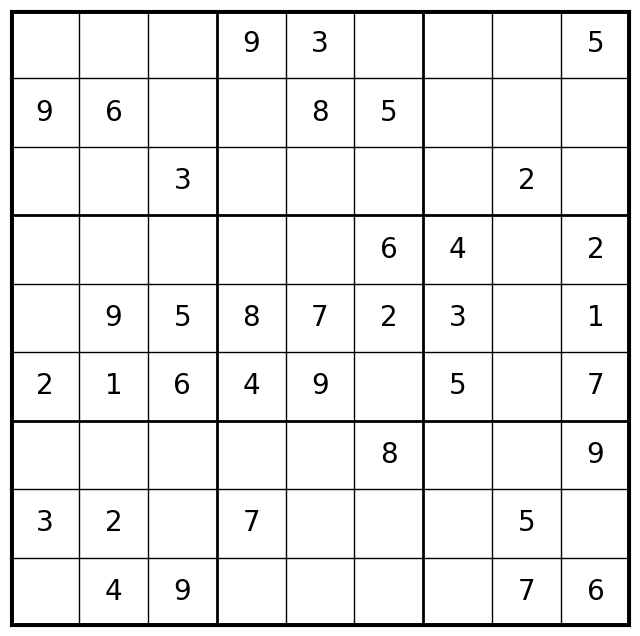

In [10]:
# Carga el Sudoku que quieras
filepath_2 = 'sudokus/medio/sudoku_1.suk'
cargar_sudoku_2 = CargarSudoku(filepath_2)
sudoku_2 = cargar_sudoku_2.cargar()
pintar_sudoku_2 = PintarSudoku(sudoku_2)
pintar_sudoku_2.dibujar_sudoku()

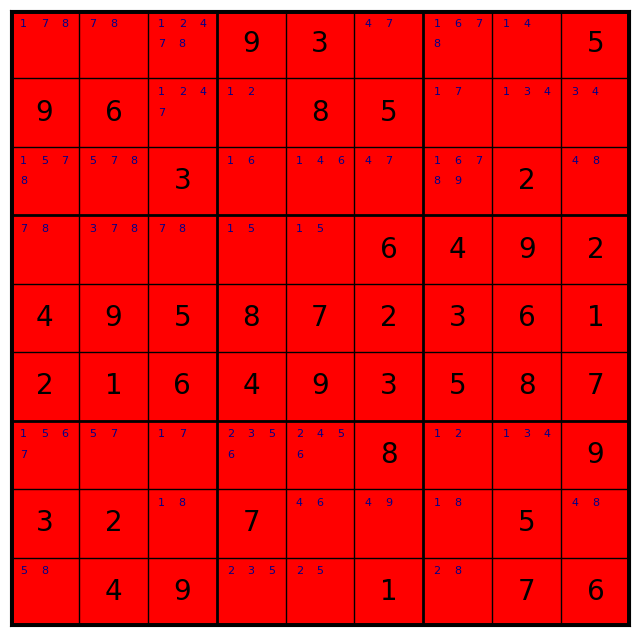

In [11]:
# Ya puedes ver si se puede resolver
resolver_sudoku_2 = ResolverSudoku(sudoku_2)
resolver_sudoku_2.resolver_sudoku()

# Si el Sudoku está resuelto lo pintamos en verde, si no está resuelto en rojo
if sudoku_2.es_sudoku_resuelto():
    pintar_sudoku_2.dibujar_sudoku(color_celda='green')
else:
    pintar_sudoku_2.dibujar_sudoku(color_celda='red')

<h2>Mejorar el algortimo de resolución</h2>
El gran problema que tiene este algoritmo es que una vez que llegamos a un punto en el cual no se puede resolver la Celda se queda con las anotaciones y no resuelve el Sudoku. Necesitamos una mejora del algoritmo que permita añadir algún número e ir probando a poder resolverlo, para ello usaremos una mejora con Backtracking.
<h3>Qué es el backtracking</h3>
El algoritmo de backtracking es un enfoque de fuerza bruta que intenta colocar números en celdas vacías, uno a uno, y retrocede cuando se encuentra con una colocación que viola las reglas del Sudoku. Aunque en su forma más básica puede ser ineficiente, se pueden aplicar varias optimizaciones para mejorar su rendimiento.
<br><br>
El backtracking es una técnica de diseño de algoritmos utilizada para resolver problemas de decisión, búsqueda y optimización. La idea principal es construir soluciones de manera incremental, eliminando aquellas que no cumplen con las condiciones del problema. En términos simples, el backtracking explora todas las posibles soluciones de un problema de forma sistemática. Si en algún momento se determina que una solución parcial no puede llevar a una solución completa, se retrocede (de ahí el término "backtrack") y se prueba otra opción.
<h3>Pasos del Backtracking</h3>
<ul>
    <li><b>Elegir:</b> Selecciona una opción.</li>
    <li><b>Explorar:</b> Intenta resolver el problema con esa opción.</li>
    <li><b>Evaluar:</b> Si la opción elegida no conduce a una solución, deshaz la elección (backtrack) y prueba con otra opción.</li>
    <li><b>Repetir:</b> Continua hasta encontrar una solución o explorar todas las posibles opciones.</li>
</ul>
Un tablero de Sudoku es una cuadrícula de 9x9, dividida en subcuadrículas de 3x3, donde algunos números ya están predefinidos. El objetivo es rellenar la cuadrícula de modo que cada fila, columna y subcuadrícula contenga todos los números del 1 al 9 sin repetirse.
<h3>Implementación Básica para el Sudoku:</h3>
<ul>
    <li><b>Elegir:</b> Selecciona una celda vacía en el tablero.</li>
    <li><b>Explorar:</b> Intenta colocar un número (del 1 al 9) en la celda.</li>
    <li><b>Evaluar:</b> Verifica si el número cumple con las reglas del Sudoku.</li>
    <ul>
        <li>Si es así, procede a la siguiente celda vacía.</li>
        <li>Si no, deshaz la elección y prueba con otro número.</li>
    </ul>
    <li><b>Repetir:</b> Continúa hasta que todas las celdas estén llenas correctamente o se hayan probado todas las opciones posibles.</li>
</ul>
<br>
A continuación mostramos una imagen con un Sudoku 4x4 para entender el proceso del Backtracking:
<br><br>

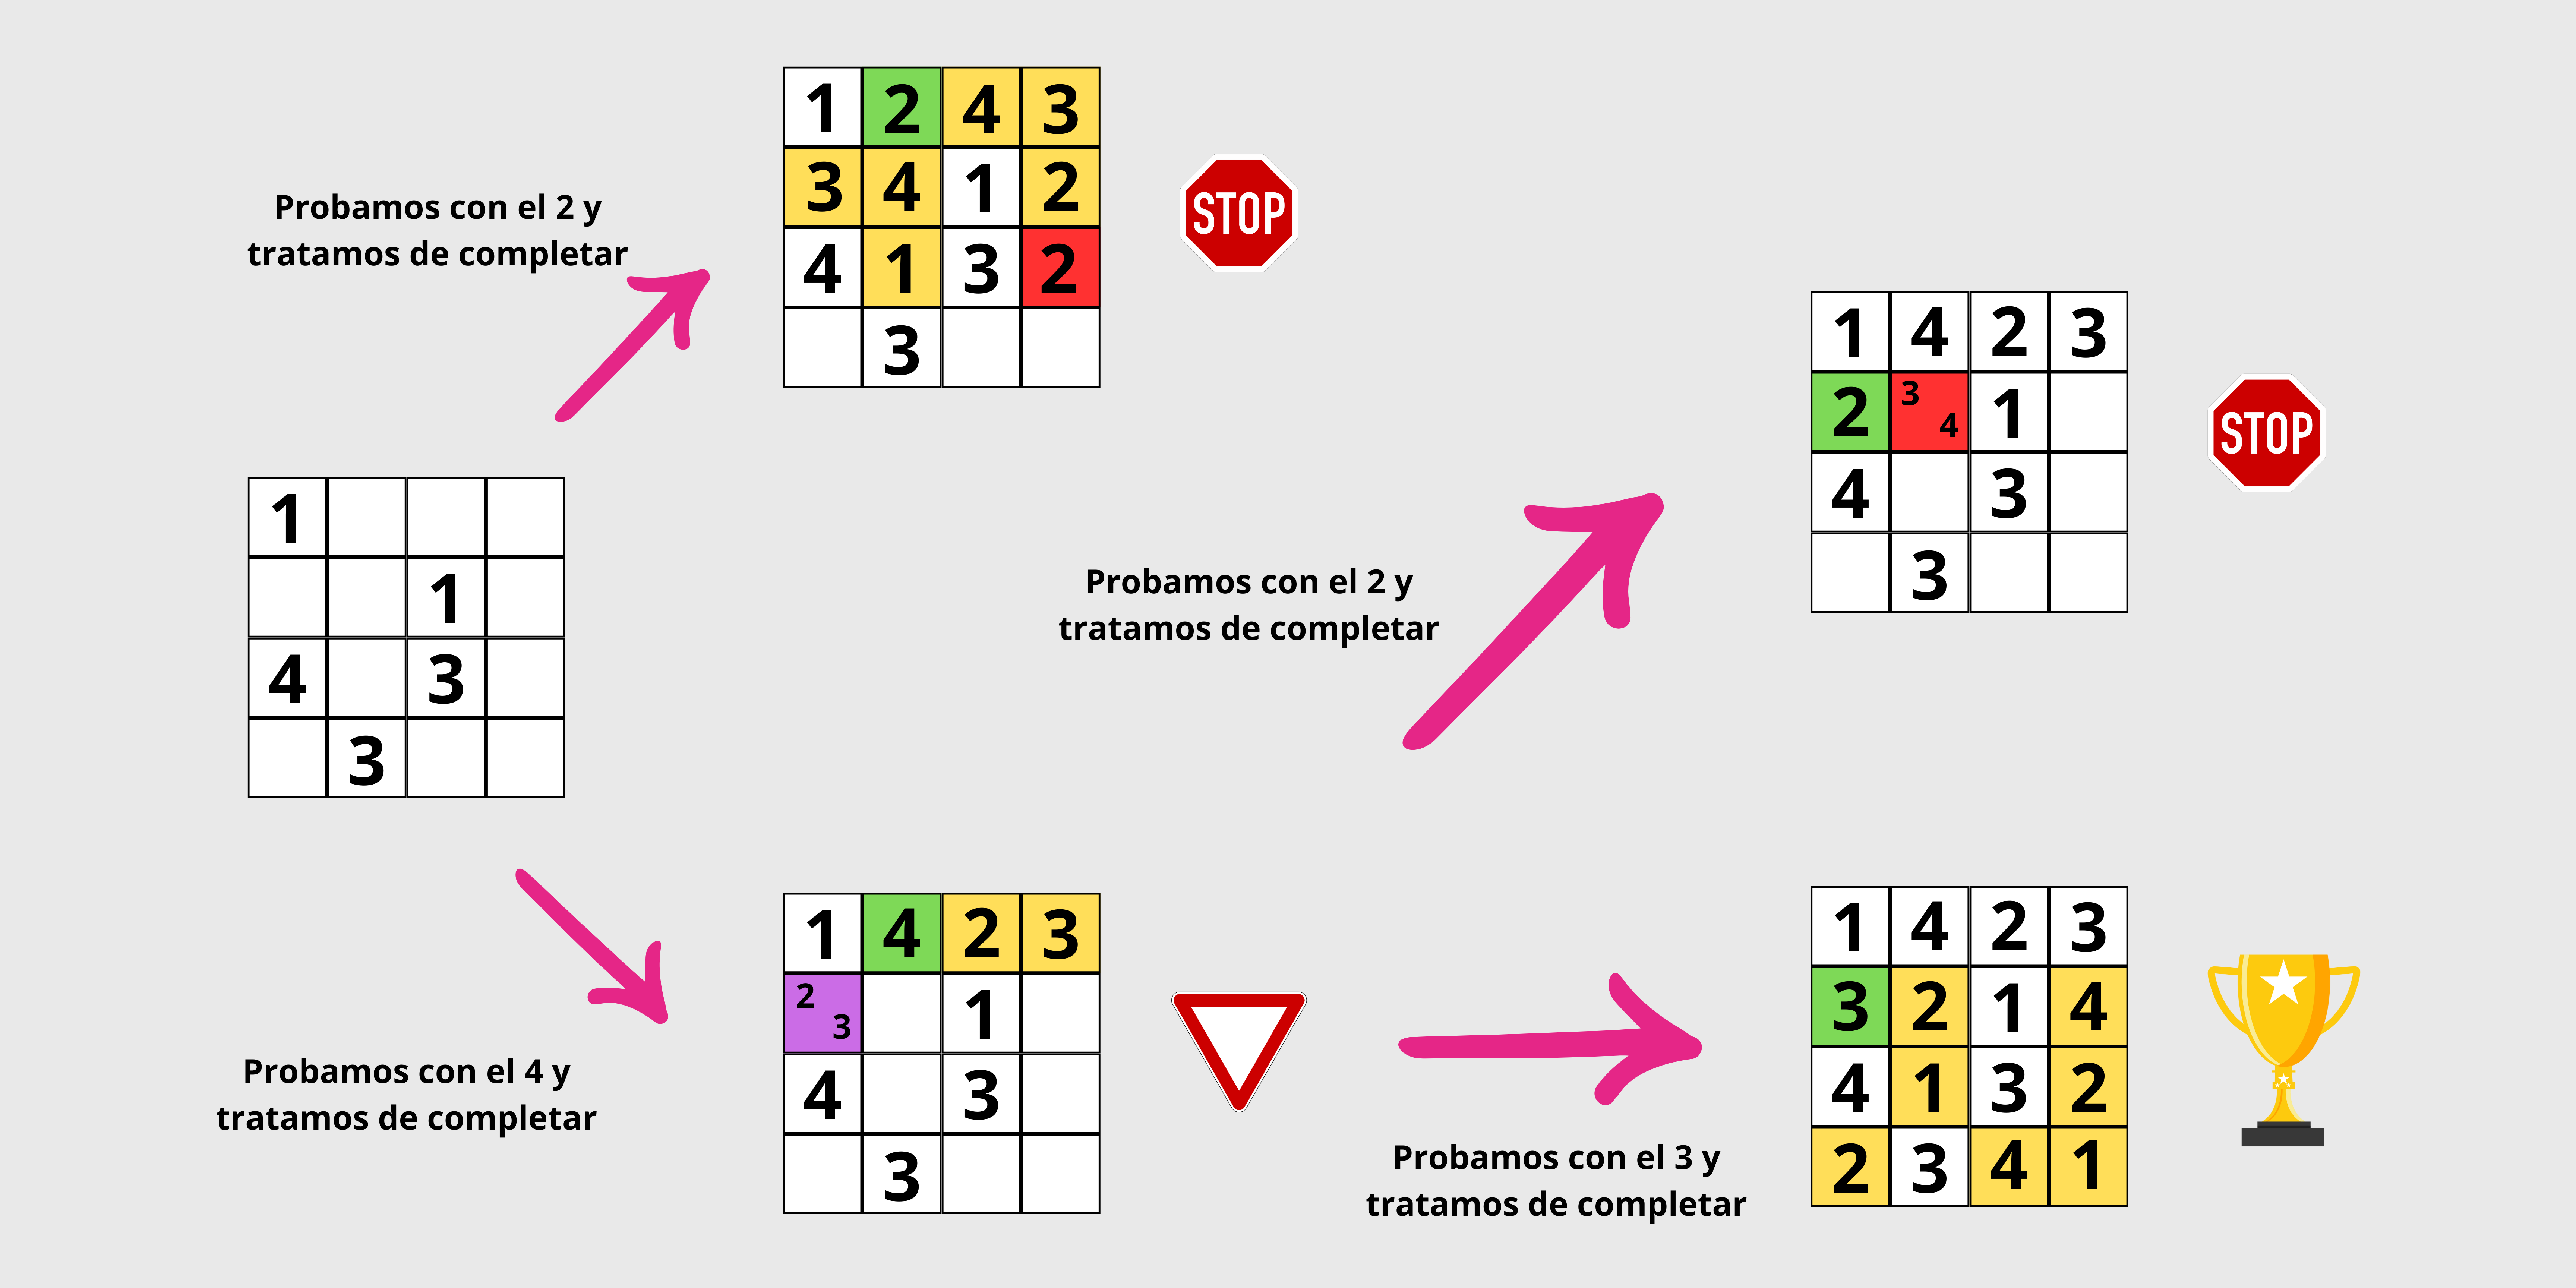

In [12]:
from IPython.display import Image

# Muestra la imagen local con una ruta absoluta
Image(filename='img/backtrackingSudoku.png')

<h3>Explicación del ejemplo anterior de Backtracking:</h3>
<h4>1- Analizamos el tablero inicial</h4>
Vemos que la primera posición libre es la 0,1 y empezaremos por ahí sabiendo que sólo podemos poner el 2 o el 4

<h4>2- Probamos el número 2</h4>
Colocamos el 2 y tratamos de resolver el Sudoku con este nuevo número. Vamos a ver que no es posible resolver el Sudoku con el 2 en esa posición por lo que tendremos que probar con el número 4 en la posición 0,1

<h4>3- Probamos el número 4</h4>
Colocamos el 4 y tratamos de resolver el Sudoku con este nuevo número. Vamos a ver que aparecer dos opciones para la posición 1,0 que son el número 2 y el número 3 por lo que tendremos que revisar cada opción con backtracking

<h5>3.1- Probamos el número 2</h5>
Colocamos el 2 y tratamos de resolver el Sudoku con este nuevo número. Vemos que nos lleva a un camino sin solución al intentar poner el primer número disponible por lo que debemos intentarlo con el siguiente número.

<h5>3.2- Probamos el número 3</h5>
Colocamos el 3 y tratamos de resolver el Sudoku con este nuevo número. En este último intento llegamos a la solución del Sudoku 4x4

In [13]:
class ResolverSudoku_Backtracking:
    def __init__(self, sudoku):
        self.sudoku = sudoku
        self.tablero = sudoku.matriz

    # Método para saber si la celda es válida en este momento
    def es_celda_valida(self, fila, columna, numero):
        for i in range(9):
            if self.tablero[fila][i].numero == numero or self.tablero[i][columna].numero == numero:
                return False
        empieza_fila, empieza_columna = 3 * (fila // 3), 3 * (columna // 3)
        for i in range(3):
            for j in range(3):
                if self.tablero[empieza_fila + i][empieza_columna + j].numero == numero:
                    return False
        return True

    # Método para resolver el Sudoku usando Backtracking puro
    def resolver_sudoku(self):
        for fila in range(9):
            for columna in range(9):
                if self.tablero[fila][columna].numero == 0:
                    for numero in range(1, 10):
                        if self.es_celda_valida(fila, columna, numero):
                            self.tablero[fila][columna].establecer_numero(numero)
                            if self.resolver_sudoku():
                                return True
                            self.tablero[fila][columna].establecer_numero(0)
                    return False
        return True

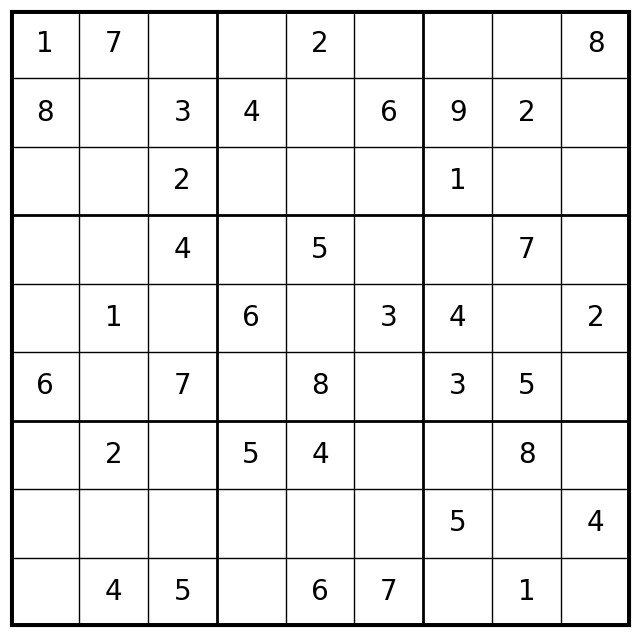

In [14]:
# Probamos com un Sudoku difícil
filepath_back= 'sudokus/dificil/sudoku_3.suk'
cargar_sudoku_back = CargarSudoku(filepath_back)
sudoku_back = cargar_sudoku_back.cargar()
pintar_sudoku_back = PintarSudoku(sudoku_back)
pintar_sudoku_back.dibujar_sudoku()

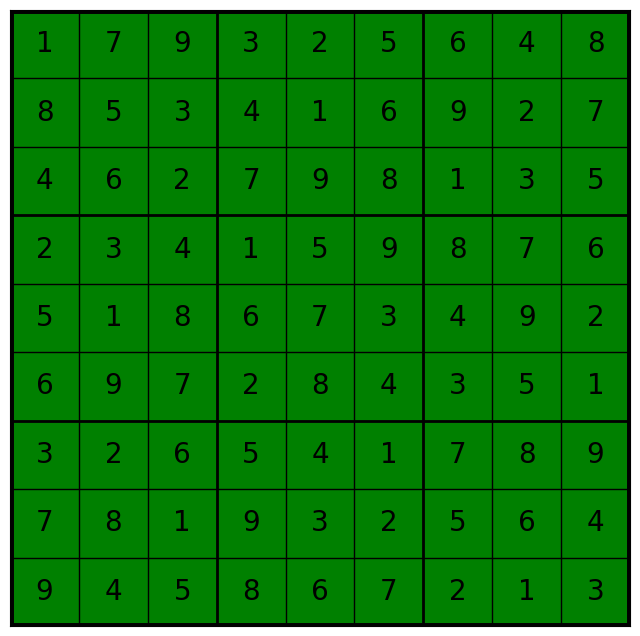

In [15]:
# Vamos a buscar una solución con la versión de Backtracking puro
resolver_sudoku_back = ResolverSudoku_Backtracking(sudoku_back)
resolver_sudoku_back.resolver_sudoku()

# Si el Sudoku está resuelto lo pintamos en verde, si no está resuelto en rojo
if sudoku_back.es_sudoku_resuelto():
    pintar_sudoku_back.dibujar_sudoku(color_celda='green')
else:
    pintar_sudoku_back.dibujar_sudoku(color_celda='red')

<h3>Explicación del Algoritmo de Backtracking Mejorado</h3>
<h4>Paso 1: Completar Anotaciones</h4>
Antes de iniciar el algoritmo de backtracking, completamos las anotaciones para cada celda vacía en el Sudoku. Las anotaciones son los posibles números que pueden ocupar una celda sin violar las reglas del Sudoku.
<h4>Paso 2: Iniciar el Backtracking</h4>
El algoritmo de backtracking se inicia una vez que todas las celdas tienen sus anotaciones completadas.
<h4>Paso 3: Encontrar Celda Vacía</h4>
Durante el proceso de backtracking, el algoritmo busca la primera celda vacía en el tablero.
<h4>Paso 4: Probar Anotaciones en la Celda</h4>
Para la celda vacía encontrada, el algoritmo intenta colocar cada número de sus anotaciones. Si un número es válido, lo coloca en la celda y procede recursivamente.
<h4>Paso 5: Verificar Validez del Número</h4>
Para cada número en las anotaciones, se verifica si su colocación en la celda es válida (no viola las reglas del Sudoku).
<br>

<h3>Explicación Visual del Algoritmo</h3>
<h4>1- Esquema Inicial del Sudoku con Anotaciones:</h4>
Las celdas vacías tienen anotaciones posibles:

<h4>2- Proceso de Backtracking:</h4>
Se selecciona una celda vacía y se intenta colocar un número válido.

<h4>3- Backtracking en Acción:</h4>
Si un número no es válido, se restaura la celda y se intenta con el siguiente número en las anotaciones.

<h3>Creamos nuestra mejora al Backtracking</h3>
El algoritmo de backtracking para resolver Sudoku trabaja probando todas las posibilidades para cada celda vacía, verificando si la colocación de un número es válida según las reglas del Sudoku. Si una colocación no lleva a una solución, el algoritmo restaura la celda a su estado original y prueba con el siguiente número posible. Esta técnica continúa hasta encontrar una solución completa o determinar que el Sudoku no tiene solución y, en este caso, añadimos el uso de las anotaciones para tener más información con la que trabajar.
<br><br>
A continuación tienes el código con el BactrackingMejorado
<br><br>

In [16]:
class ResolverSudoku_BacktrackingMejorado:
    def __init__(self, sudoku):
        self.sudoku = sudoku
        self.log = []
        self.numPasosTablero = 0
        self.numPasosCelda = 0
        self.tableroPrimeraPos = [
            [0,0], [0,3], [0,6],
            [3,0], [3,3], [3,6],
            [6,0], [6,3], [6,6]
        ]

    def registrar_log(self, mensaje):
        self.log.append(mensaje)

    def mostrar_log(self):
        for entrada in self.log:
            print(entrada)

    def mostrar_info_sudoku(self, i, j, numTablero):
        print(f"Tablero{numTablero} pos[{i},{j}]={self.sudoku.matriz[i][j]}")

    def resolver_sudoku(self):
        self.completar_todos_tableros()
        if not self.backtracking_resolver():
            print("No se pudo resolver el Sudoku con backtracking.")

    def completar_todos_tableros(self):
        for numTablero in range(9):
            self.numPasosTablero += 1
            self.completar_tablero(numTablero)
            self.registrar_log(f"Tratamos de resolver el Tablero{numTablero} NumPasosTablero({self.numPasosTablero})")
    
    def completar_tablero(self, numTablero):
        posInicial = self.tableroPrimeraPos[numTablero]
        filaInicial = posInicial[0]
        columnaInicial = posInicial[1]
        for i in range(3):
            for j in range(3):
                self.completar_anotaciones(filaInicial+i, columnaInicial+j, numTablero)    
    
    def completar_anotaciones(self, posFila, posColumna, numTablero):
        celda = self.sudoku.matriz[posFila][posColumna]
        if celda.numero == 0:
            conjuntoFila = self.sudoku.obtener_conjunto_fila(posFila)
            conjuntoColumna = self.sudoku.obtener_conjunto_columna(posColumna)
            conjuntoTablero = self.sudoku.obtener_conjunto_tablero(numTablero)
            posibles_numeros = set(range(1, 10)) - (conjuntoFila | conjuntoColumna | conjuntoTablero)
            self.numPasosCelda += 1
            if len(posibles_numeros) == 1:
                numero = posibles_numeros.pop()
                celda.establecer_numero(numero)
                self.registrar_log(f"Colocado {numero} en ({posFila}, {posColumna}) NumPasosCelda({self.numPasosCelda})")
            else:
                celda.listado_de_anotaciones = posibles_numeros
                self.registrar_log(f"Colocadas anotaciones {posibles_numeros} en ({posFila}, {posColumna}) NumPasosCelda({self.numPasosCelda})")

    def backtracking_resolver(self):
        empty = self.encontrar_celda_vacia()
        if not empty:
            return True  # Sudoku resuelto

        fila, col = empty
        celda = self.sudoku.matriz[fila][col]
        # Necesitamos hacer una copia de las anotaciones de la Celda para no perderlas con el backtracking
        anotaciones_originales = list(celda.listado_de_anotaciones)  # Convertir a lista para evitar el error
        for numero in anotaciones_originales:  # Usar las anotaciones como candidatos
            if self.es_numero_valido(fila, col, numero):
                celda.establecer_numero(numero)
                if self.backtracking_resolver():
                    return True
                celda.numero = 0
                celda.listado_de_anotaciones = set(anotaciones_originales)  # Restaurar las anotaciones originales

        return False

    def encontrar_celda_vacia(self):
        for i in range(9):
            for j in range(9):
                if self.sudoku.matriz[i][j].numero == 0:
                    return i, j
        return None

    def es_numero_valido(self, fila, columna, numero):
        for i in range(9):
            if self.sudoku.matriz[fila][i].numero == numero or self.sudoku.matriz[i][columna].numero == numero:
                return False

        fila_inicio = (fila // 3) * 3
        columna_inicio = (columna // 3) * 3
        for i in range(3):
            for j in range(3):
                if self.sudoku.matriz[fila_inicio + i][columna_inicio + j].numero == numero:
                    return False

        return True

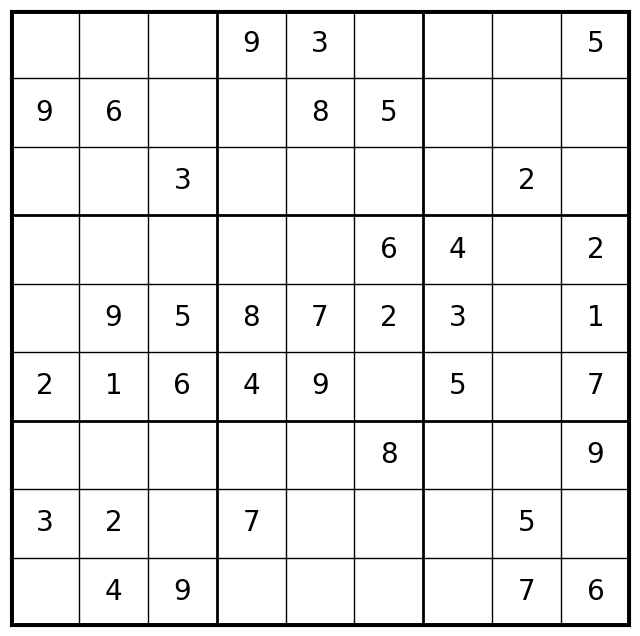

In [17]:
# Carga el Sudoku que quieras
filepath_3 = 'sudokus/medio/sudoku_1.suk'
cargar_sudoku_3 = CargarSudoku(filepath_3)
sudoku_3 = cargar_sudoku_3.cargar()
pintar_sudoku_3 = PintarSudoku(sudoku_3)
pintar_sudoku_3.dibujar_sudoku()

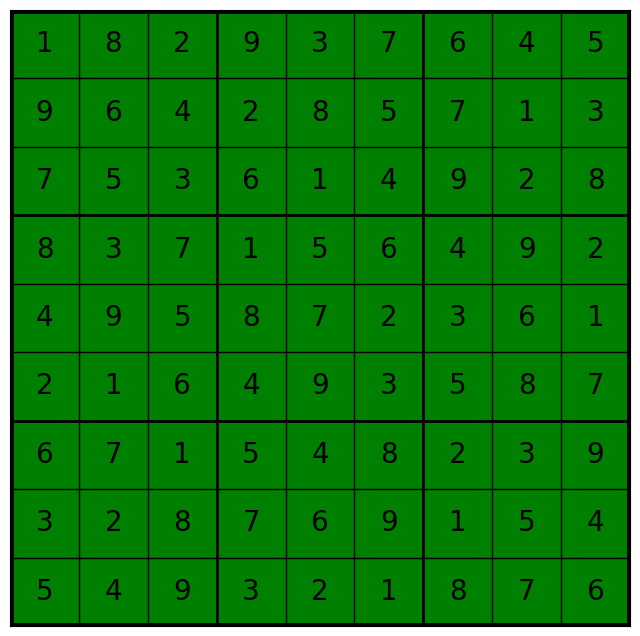

In [18]:
# Vamos a buscar una solución con la versión de Backtracking
resolver_sudoku_3 = ResolverSudoku_BacktrackingMejorado(sudoku_3)
resolver_sudoku_3.resolver_sudoku()

# Si el Sudoku está resuelto lo pintamos en verde, si no está resuelto en rojo
if sudoku_3.es_sudoku_resuelto():
    pintar_sudoku_3.dibujar_sudoku(color_celda='green')
else:
    pintar_sudoku_3.dibujar_sudoku(color_celda='red')

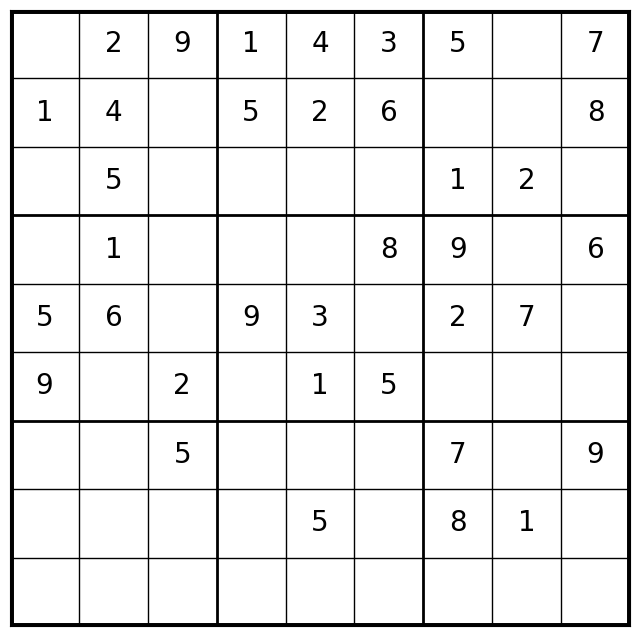

In [19]:
# Carga un Sudoku difícil
filepath_4 = 'sudokus/dificil/sudoku_4.suk'
cargar_sudoku_4 = CargarSudoku(filepath_4)
sudoku_4 = cargar_sudoku_4.cargar()
pintar_sudoku_4 = PintarSudoku(sudoku_4)
pintar_sudoku_4.dibujar_sudoku()

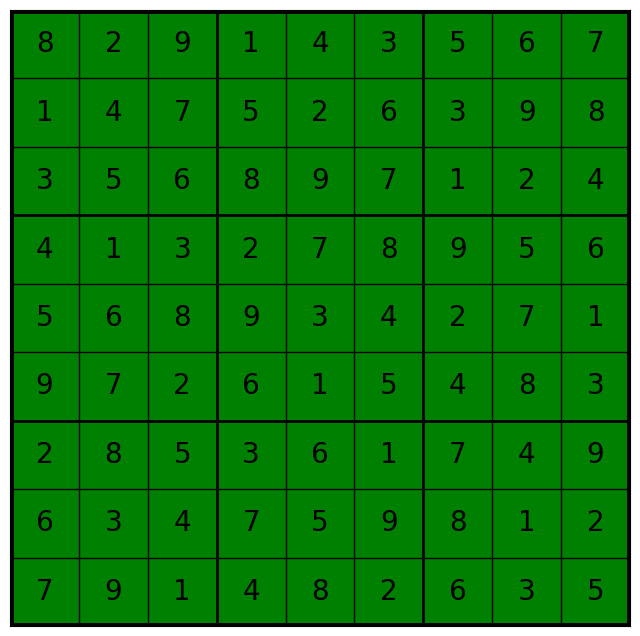

In [20]:
# Vamos a buscar una solución con la versión de Backtracking
resolver_sudoku_4 = ResolverSudoku_BacktrackingMejorado(sudoku_4)
resolver_sudoku_4.resolver_sudoku()

# Si el Sudoku está resuelto lo pintamos en verde, si no está resuelto en rojo
if sudoku_4.es_sudoku_resuelto():
    pintar_sudoku_4.dibujar_sudoku(color_celda='green')
else:
    pintar_sudoku_4.dibujar_sudoku(color_celda='red')

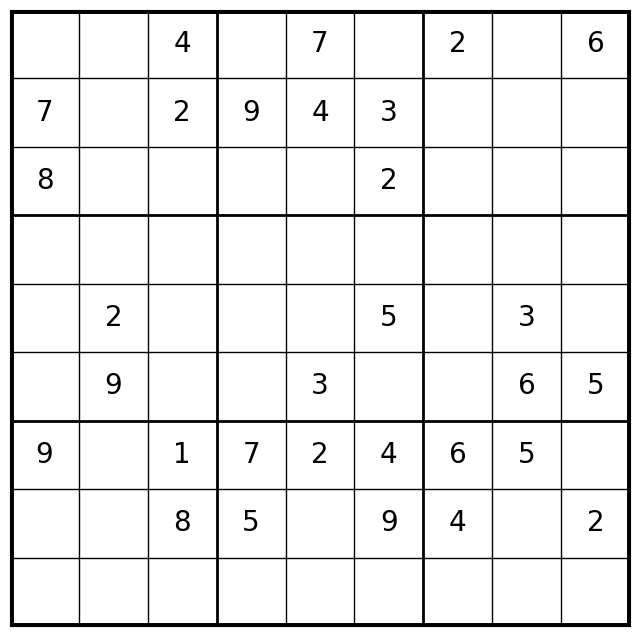

In [21]:
# Carga un Sudoku "experto"
filepath_5 = 'sudokus/experto/sudoku_1.suk'
cargar_sudoku_5 = CargarSudoku(filepath_5)
sudoku_5 = cargar_sudoku_5.cargar()
pintar_sudoku_5 = PintarSudoku(sudoku_5)
pintar_sudoku_5.dibujar_sudoku()

No se pudo resolver el Sudoku con backtracking.


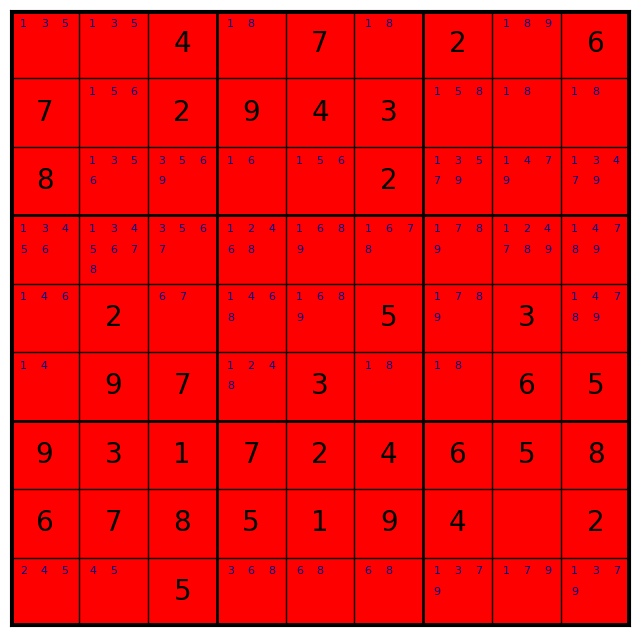

In [22]:
# Vamos a buscar una solución con la versión de Backtracking
resolver_sudoku_5 = ResolverSudoku_BacktrackingMejorado(sudoku_5)
resolver_sudoku_5.resolver_sudoku()

# Si el Sudoku está resuelto lo pintamos en verde, si no está resuelto en rojo
if sudoku_5.es_sudoku_resuelto():
    pintar_sudoku_5.dibujar_sudoku(color_celda='green')
else:
    pintar_sudoku_5.dibujar_sudoku(color_celda='red')

<h2>Qué otros algoritmos existen para resolver un Sudoku</h2>
Como seguramente te hayas dado cuenta existen diferentes estrategias y mejoras para resolver Sudokus, en nuestro caso trabajos el backtracking y una mejora del mismo utilizando las anotaciones. En el siguiente listado te hablamos de otros algoritmos que existen:

<h3>1- Algoritmos de Reducción de Dominios</h3>
<ul>
   <li><b>Algoritmo de Consistencia de Arcos (AC-3):</b> Este algoritmo elimina valores de los dominios de las variables que no pueden ser parte de ninguna solución. Se basa en la consistencia de arcos, es decir, asegura que para cada valor en el dominio de una variable, exista un valor consistente en el dominio de cada variable conectada.</li>
</ul>

<h3>2- Algoritmos Basados en Satisfacción de Restricciones (CSP)</h3>
<ul>
    <li><b>Forward Checking:</b> Este es un mejoramiento del backtracking que, al asignar un valor a una variable, revisa todas las variables conectadas para asegurarse de que tienen valores consistentes disponibles.</li>
    <li><b>Constraint Propagation:</b> Este algoritmo combina forward checking con técnicas adicionales de propagación de restricciones, reduciendo los dominios de las variables de manera más agresiva.</li>
</ul>

<h3>3-Algoritmos Metaheurísticos</h3>
<ul>
    <li><b>Simulated Annealing:</b> Este algoritmo es una técnica de optimización probabilística que intenta escapar de los mínimos locales al permitir movimientos que empeoran la solución bajo ciertas condiciones.</li>
    <li><b>Genetic Algorithms:</b> Utilizan principios de selección natural para evolucionar una población de soluciones posibles hacia una solución óptima.</li>
    <li><b>Ant Colony Optimization:</b> Utiliza una colonia de hormigas que depositan feromonas en un grafo, favoreciendo caminos que representan soluciones prometedoras.</li>
</ul>

<h3>4-Métodos Basados en Inteligencia Artificial</h3>
<ul>
    <li><b>Machine Learning:</b> Algoritmos de aprendizaje supervisado o no supervisado pueden entrenarse en grandes bases de datos de Sudokus resueltos para aprender patrones y estrategias de resolución.</li>
    <li><b>Deep Learning:</b> Redes neuronales profundas pueden entrenarse para resolver Sudokus, aunque esto generalmente requiere una gran cantidad de datos y poder de cómputo.</li>
</ul>

<h3>5-Algoritmos Exactos</h3>
<ul>
    <li><b>Algoritmo Dancing Links (DLX):</b> Este es un método muy eficiente basado en el algoritmo de Knuth para resolver el problema exacto de cobertura. Es altamente eficiente para resolver Sudokus y se ha demostrado que funciona muy bien en la práctica.</li>
    <li><b>Método de Programación Entera:</b> Modela el Sudoku como un problema de programación lineal entera y utiliza solvers como CPLEX o Gurobi para encontrar una solución óptima.</li>
</ul>

<h2>Comparación y Selección</h2>
La selección del mejor algoritmo depende del contexto específico y de los recursos disponibles. A continuación, se ofrece una breve comparación:
<ul>
    <li><b>Backtracking y Variantes:</b> Sencillos de implementar, pero pueden ser lentos para Sudokus muy complejos.
    <li><b>AC-3 y Forward Checking:</b> Mejoran la eficiencia eliminando valores inconsistentes de manera anticipada.
    <li><b>Metaheurísticos:</b> Ofrecen soluciones razonables en tiempos aceptables para muchos problemas prácticos, aunque no siempre garantizan una solución óptima.
    <li><b>Dancing Links:</b> Extremadamente eficiente y altamente recomendado para resolver Sudokus.
    <li><b>Machine Learning y Deep Learning:</b> Pueden ser muy poderosos, pero requieren entrenamiento previo y son más complejos de implementar.
</ul>